# **Read in and Explore the data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import patsy
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime


%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [3]:
## Read in the Tarin_data set
stock_train = pd.read_csv('Tadawul_stcks.csv')
stock_train

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,1.539907e+07,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,2.598139e+07,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,1.711641e+07,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,2.585870e+07,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,2.574797e+07,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593814,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-28,22.90,22.90,21.62,22.50,0.00,0.00,1860532.0,4.149566e+07,2023.0
593815,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-27,23.30,23.32,22.24,22.50,-0.84,-3.60,4905676.0,1.114168e+08,3259.0
593816,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-26,24.60,24.60,23.30,23.34,-1.16,-4.73,3908215.0,9.269862e+07,2672.0
593817,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-23,24.80,25.00,24.34,24.50,-0.50,-2.00,4078214.0,1.002221e+08,5571.0


In [4]:
## Read in the Test_data set
stock_test = pd.read_csv('Tadawul_stcks_23_4.csv') 
stock_test

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.80,31.80,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.50,31.40,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.70,32.30,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.70,32.90,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.50,32.80,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-12,20.20,21.20,20.16,20.70,-1.70,-7.59,1618746.0,33206311.44,2329.0
6988,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-11,24.50,24.50,21.60,22.40,-1.60,-6.67,1487872.0,33903289.20,2092.0
6989,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-10,22.98,24.24,22.68,24.00,1.22,5.36,1877511.0,43740461.26,2359.0
6990,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-09,22.78,23.18,22.78,22.78,-2.52,-9.96,1041240.0,23747279.76,893.0


In [5]:
stock_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   symbol          593819 non-null  int64  
 1   name            593819 non-null  object 
 2   trading_name    593819 non-null  object 
 3   sectoer         593819 non-null  object 
 4   date            593819 non-null  object 
 5   open            587364 non-null  float64
 6   high            587122 non-null  float64
 7   low             587122 non-null  float64
 8   close           593819 non-null  float64
 9   change          593819 non-null  float64
 10  perc_Change     593819 non-null  float64
 11  volume_traded   593819 non-null  float64
 12  value_traded    593819 non-null  float64
 13  no_trades       586128 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 54.4+ MB


In [6]:
stock_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symbol          6992 non-null   int64  
 1   name            6992 non-null   object 
 2   trading_name    6992 non-null   object 
 3   sectoer         6992 non-null   object 
 4   date            6992 non-null   object 
 5   open            6830 non-null   float64
 6   high            6830 non-null   float64
 7   low             6830 non-null   float64
 8   close           6992 non-null   float64
 9   change          6992 non-null   float64
 10  perc_Change     6992 non-null   float64
 11  volume_traded   6992 non-null   float64
 12  value_traded    6992 non-null   float64
 13  no_trades       6992 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 655.6+ KB


In [7]:
stock_train.shape

(593819, 14)

In [8]:
stock_test.shape

(6992, 14)

In [9]:
stock_train.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,593819.000000,587364.000000,587122.000000,587122.000000,593819.000000,593819.000000,593819.000000,5.938190e+05,5.938190e+05,586128.000000
mean,3952.684793,41.237794,41.971636,40.593406,40.961602,0.001174,0.035652,1.673422e+06,5.008553e+07,960.642348
std,2284.498530,86.713646,89.178183,84.562283,86.491709,4.782545,3.480783,5.482121e+06,1.472969e+08,3401.794136
min,1010.000000,1.950000,1.950000,1.950000,0.000000,-681.200000,-100.000000,0.000000e+00,0.000000e+00,0.000000
25%,2140.000000,16.200000,16.400000,16.000000,16.070000,-0.250000,-0.910000,1.484920e+05,4.114858e+06,158.000000
50%,4004.000000,26.500000,26.905000,26.100000,26.300000,0.000000,0.000000,4.335560e+05,1.210533e+07,376.000000
75%,5110.000000,46.500000,47.200000,45.850000,46.200000,0.250000,0.910000,1.271184e+06,3.561017e+07,900.000000
max,8312.000000,6709.150000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,7.976659e+08,1.586582e+10,816526.000000


# **Data Cleaning**

In [10]:
stock_train.dropna(inplace = True)

In [11]:
stock_train.open[stock_train.open>47.0]= stock_train.open.median()

<ipython-input-11-05d2f41a02e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.open[stock_train.open>47.0]= stock_train.open.median()


In [12]:
stock_train.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,5.794310e+05,5.794310e+05,579431.000000
mean,3984.734310,23.580793,42.103684,40.716484,41.383652,0.002855,0.037626,1.500712e+06,4.774507e+07,971.673600
std,2279.808371,9.358917,89.722268,85.076910,87.452074,4.752609,3.496453,4.409527e+06,1.421414e+08,3419.830041
min,1010.000000,1.950000,1.950000,1.950000,1.940000,-424.830000,-98.010000,1.010000e+02,3.930000e+03,1.000000
25%,2160.000000,16.250000,16.500000,16.050000,16.250000,-0.250000,-0.930000,1.523725e+05,4.231735e+06,163.000000
50%,4005.000000,26.500000,26.900000,26.100000,26.510000,0.000000,0.000000,4.327890e+05,1.209221e+07,383.000000
75%,6001.000000,26.710000,47.260000,45.900000,46.560000,0.250000,0.930000,1.236244e+06,3.455978e+07,911.000000
max,8312.000000,47.000000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,4.179278e+08,1.586582e+10,816526.000000


In [13]:
stock_train['date'] =  pd.to_datetime(stock_train['date'])

In [14]:
stock_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579431 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   symbol          579431 non-null  int64         
 1   name            579431 non-null  object        
 2   trading_name    579431 non-null  object        
 3   sectoer         579431 non-null  object        
 4   date            579431 non-null  datetime64[ns]
 5   open            579431 non-null  float64       
 6   high            579431 non-null  float64       
 7   low             579431 non-null  float64       
 8   close           579431 non-null  float64       
 9   change          579431 non-null  float64       
 10  perc_Change     579431 non-null  float64       
 11  volume_traded   579431 non-null  float64       
 12  value_traded    579431 non-null  float64       
 13  no_trades       579431 non-null  float64       
dtypes: datetime64[ns](1), float64(9), in

In [15]:
stock_train['year'] = pd. DatetimeIndex(stock_train['date']). year

In [16]:
stock_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579431 entries, 0 to 593818
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   symbol          579431 non-null  int64         
 1   name            579431 non-null  object        
 2   trading_name    579431 non-null  object        
 3   sectoer         579431 non-null  object        
 4   date            579431 non-null  datetime64[ns]
 5   open            579431 non-null  float64       
 6   high            579431 non-null  float64       
 7   low             579431 non-null  float64       
 8   close           579431 non-null  float64       
 9   change          579431 non-null  float64       
 10  perc_Change     579431 non-null  float64       
 11  volume_traded   579431 non-null  float64       
 12  value_traded    579431 non-null  float64       
 13  no_trades       579431 non-null  float64       
 14  year            579431 non-null  int

In [17]:
stock_train.high[stock_train.high>50]= stock_train.high.median()

<ipython-input-17-a06520ac58a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.high[stock_train.high>50]= stock_train.high.median()


In [18]:
stock_train.low[stock_train.low>47.0]= stock_train.low.median()

<ipython-input-18-de563b82f80d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.low[stock_train.low>47.0]= stock_train.low.median()


In [19]:
stock_train.close[stock_train.close>55]= stock_train.close.median()

<ipython-input-19-48f0cb6664b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.close[stock_train.close>55]= stock_train.close.median()


In [20]:
stock_train.change[stock_train.change>50]= stock_train.close.median()


<ipython-input-20-4b19f9879faa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.change[stock_train.change>50]= stock_train.close.median()


In [21]:
stock_train.change[stock_train.change<-50]= stock_train.close.median()

<ipython-input-21-a08a8cd42473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.change[stock_train.change<-50]= stock_train.close.median()


In [22]:
stock_train.perc_Change[stock_train.perc_Change>99.9]= stock_train.perc_Change.median()
stock_train.perc_Change[stock_train.perc_Change<-99.9]= stock_train.perc_Change.median()

<ipython-input-22-9765fceeb915>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.perc_Change[stock_train.perc_Change>99.9]= stock_train.perc_Change.median()
<ipython-input-22-9765fceeb915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.perc_Change[stock_train.perc_Change<-99.9]= stock_train.perc_Change.median()


In [23]:
stock_train.columns = stock_train.columns.str.replace(' ', '')

In [24]:
stock_train.no_trades[stock_train.no_trades>1500]= stock_train.no_trades.median()

<ipython-input-24-027368e45ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.no_trades[stock_train.no_trades>1500]= stock_train.no_trades.median()


In [25]:
stock_train.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,year
count,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,5.794310e+05,5.794310e+05,579431.000000,579431.000000
mean,3984.734310,23.580793,24.307217,23.359174,24.868383,0.018833,0.032446,1.500712e+06,4.774507e+07,409.677047,2012.238111
std,2279.808371,9.358917,10.040658,9.367190,11.178726,2.138068,2.655504,4.409527e+06,1.421414e+08,328.219005,4.943491
min,1010.000000,1.950000,1.950000,1.950000,1.940000,-48.540000,-98.010000,1.010000e+02,3.930000e+03,1.000000,2001.000000
25%,2160.000000,16.250000,16.500000,16.050000,16.250000,-0.250000,-0.930000,1.523725e+05,4.231735e+06,163.000000,2009.000000
50%,4005.000000,26.500000,26.900000,26.100000,26.510000,0.000000,0.000000,4.327890e+05,1.209221e+07,383.000000,2013.000000
75%,6001.000000,26.710000,28.000000,26.600000,29.600000,0.250000,0.930000,1.236244e+06,3.455978e+07,527.000000,2016.000000
max,8312.000000,47.000000,50.000000,47.000000,55.000000,49.680000,76.000000,4.179278e+08,1.586582e+10,1500.000000,2020.000000


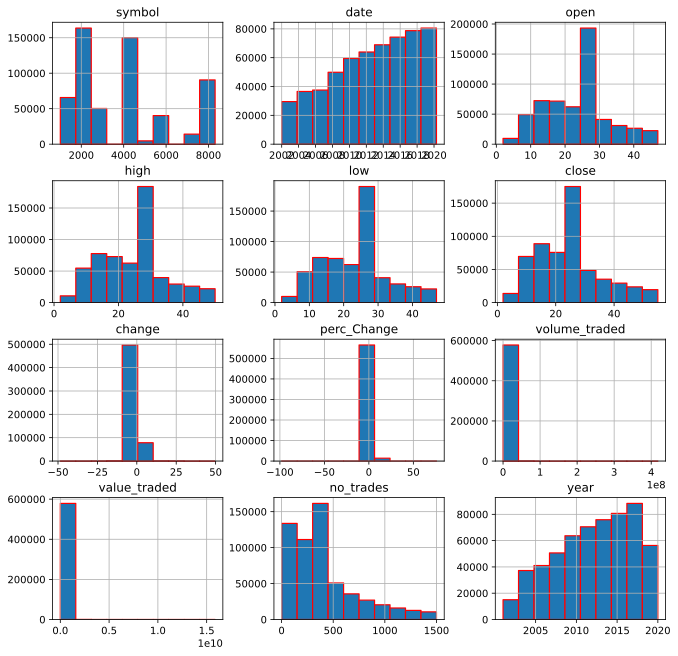

In [26]:
stock_train.hist(edgecolor='red', linewidth=1.2, figsize=(11, 11));

# **Data Visualization**

# •	What is the highest profit Sector?

In [27]:
stock_train[['sectoer', 'close']].max()

sectoer    Utilities
close           55.0
dtype: object

.

# •	What is the most valuable year in the Saudi stock market? 

In [28]:
a=stock_train.groupby(['year'])[['high']].sum().sort_values('high', ascending=False)
a

,high
year,
2014,1106725.61
2015,1100556.92
2018,987134.00
2013,984431.39
2017,984136.10
2019,965445.75
2012,947671.35
2016,926969.47
2011,805166.17


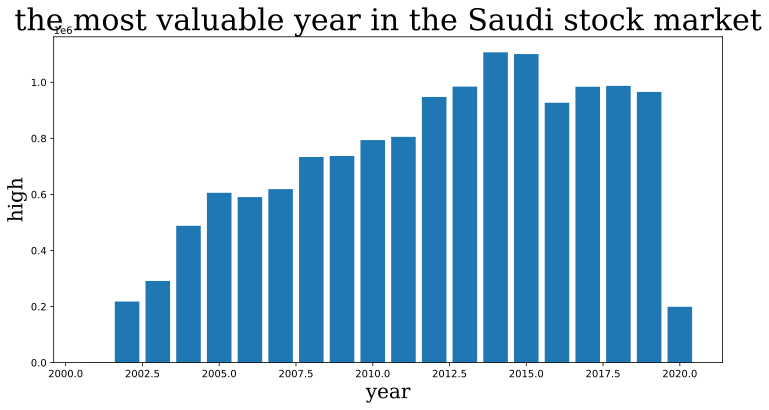

In [46]:
plt.figure(figsize=[12,6]);
plt.bar(a.index,a.high);
plt.title('the most valuable year in the Saudi stock market',fontsize=30,color='black',family='serif');
plt.xlabel('year',fontsize=20,color='black',family='serif');
plt.ylabel('high',fontsize=20,color='black',family='serif');


.

# •	What is the lowiest valuable year in the Saudi stock market?

In [30]:
b=stock_train.groupby(['year'])[['low']].sum().sort_values('low')
b

,low
year,
2001,660.23
2020,190418.11
2002,211295.14
2003,283523.26
2004,468711.65
2006,563783.90
2005,580036.95
2007,590985.01
2008,700862.53


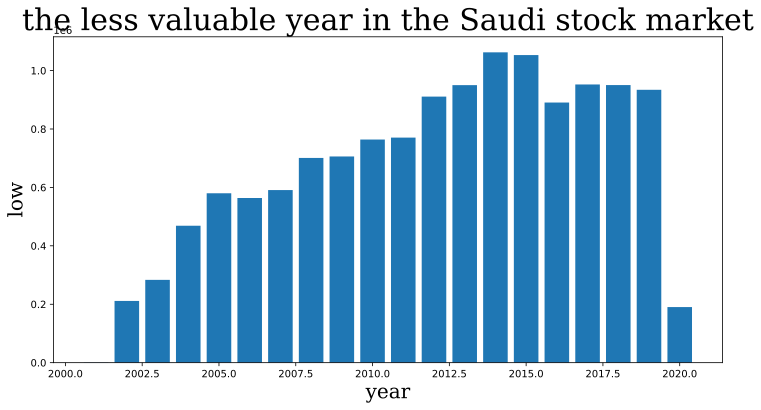

In [42]:
plt.figure(figsize=[12,6]);
plt.bar(b.index,b.low);
plt.title('the less valuable year in the Saudi stock market',fontsize=30,color='black',family='serif');
plt.xlabel('year',fontsize=20,color='black',family='serif');
plt.ylabel('low',fontsize=20,color='black',family='serif');

.

# •	What is the percentage change in the sector, and what is the highest sector?

In [41]:
c=stock_train.groupby(['sectoer'])[['perc_Change']].max().sort_values('perc_Change', ascending=False)
c 

,perc_Change
sectoer,
Materials,76.00
Consumer Discretionary,42.52
Financials,37.72
Consumer Staples,20.19
Information Technology,20.00
Industrials,17.80
Health Care,13.73
Real Estate,12.00
Communication Services,11.76


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

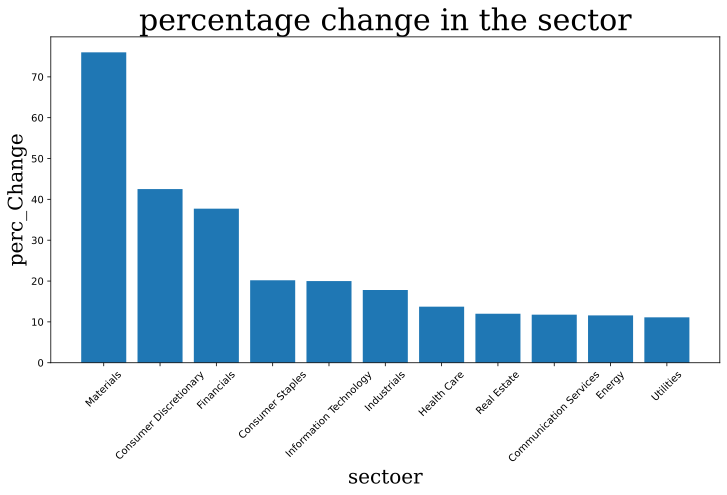

In [47]:
plt.figure(figsize=[12,6]);
plt.bar(c.index,c.perc_Change);
plt.title('percentage change in the sector',fontsize=30,color='black',family='serif');
plt.xlabel('sectoer',fontsize=20,color='black',family='serif');
plt.ylabel('perc_Change',fontsize=20,color='black',family='serif');
plt.xticks(rotation=45)